# Character Recognition 
## using Multi-Layer Perceptron (MLP)


![http://pubs.sciepub.com/automation/2/1/4/image/fig1.png](attachment:image.png "MLP")
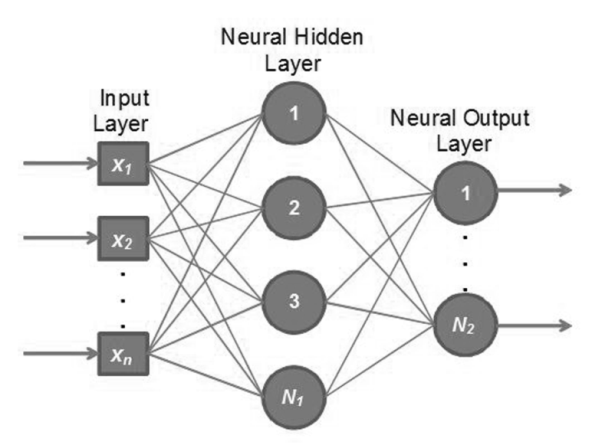

In [1]:
# Alternative local file loader (due to mldata.org being down)
from scipy.io import loadmat

mnist_raw = loadmat("mldata/mnist-original.mat")
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
    }

X,y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

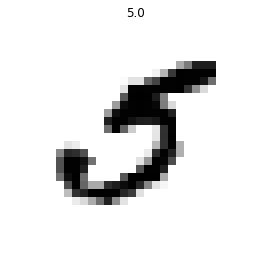

In [3]:
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(
    some_digit_image, 
    cmap = plt.cm.binary,
    interpolation="nearest")

plt.title(y[36000])
plt.axis("off")
plt.show()

In [51]:
import numpy as np

shuffle_index = np.random.permutation(70000)
X, y = X[shuffle_index], y[shuffle_index]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((60000, 784), (10000, 784), (60000,), (10000,))


## Visualization

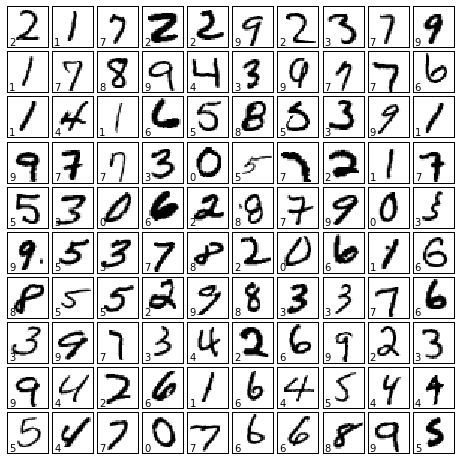

In [73]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape((28,28)), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(int(y_train[i])),
           transform=ax.transAxes, color='black')

plt.show()

## Create MLP Model

In [53]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=0.001)

mlp.fit(X_train, y_train)

Iteration 1, loss = 1.81871326
Iteration 2, loss = 1.05944149
Iteration 3, loss = 0.69554161
Iteration 4, loss = 0.50766222
Iteration 5, loss = 0.38525626
Iteration 6, loss = 0.33714014
Iteration 7, loss = 0.30388212
Iteration 8, loss = 0.28367218
Iteration 9, loss = 0.26573927
Iteration 10, loss = 0.25603315


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=1e-05, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [54]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.934917
Test set score: 0.923400


## Prediction

In [55]:
yfit = mlp.predict(X_test)

y_test.shape

(10000,)

## Classification report

In [56]:
from sklearn.metrics import classification_report

tn = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, yfit,
                            target_names=tn))

             precision    recall  f1-score   support

          0       0.95      0.96      0.95       971
          1       0.98      0.96      0.97      1121
          2       0.92      0.91      0.92       971
          3       0.91      0.89      0.90      1016
          4       0.95      0.90      0.92      1010
          5       0.90      0.90      0.90       896
          6       0.94      0.95      0.95      1025
          7       0.95      0.93      0.94      1080
          8       0.83      0.91      0.87       942
          9       0.89      0.92      0.90       968

avg / total       0.92      0.92      0.92     10000



## Confusion matrix

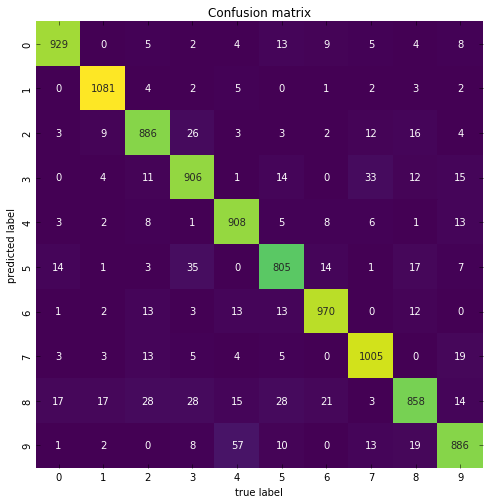

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, yfit)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='viridis',
            xticklabels=tn,
            yticklabels=tn,
            ax=ax)
plt.title('Confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [58]:
from sklearn.metrics import accuracy_score

print("Accuracy", accuracy_score(y_test, yfit)*100)

('Accuracy', 92.34)


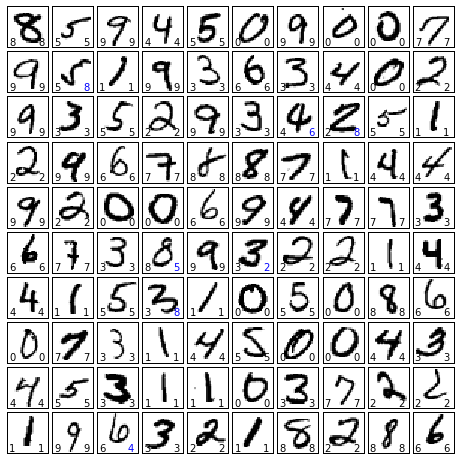

In [78]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape((28,28)), cmap='binary', interpolation='nearest')
    # actual class
    ax.text(0.05, 0.05, str(int(y_test[i])),
            transform=ax.transAxes, 
            color='black')    
    # predict class
    ax.text(0.75, 0.05, str(int(yfit[i])),
            transform=ax.transAxes, 
            color='black' if yfit[i] == y_test[i] else 'blue')

plt.show()